<a href="https://colab.research.google.com/github/KLU-Venky/TechnoHacks/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction**

House price prediction involves using various techniques and data analysis methods to estimate the future value of residential properties. This process integrates factors such as location, property features, market trends, economic indicators, and historical data to provide insights into potential price changes. It is a complex and multidimensional task that aids homebuyers, sellers, and real estate professionals in making informed decisions.

In harmony with the techniques, ensemble methods amalgamate predictions from multiple models, enhancing prediction robustness and reliability. House price prediction, as a synthesis of data-driven analyses, domain expertise, and economic insights, empowers stakeholders in the real estate arena to navigate market fluctuations, investment decisions, and risk management more effectively. This informed approach fosters a more transparent, efficient, and dynamic real estate landscape.

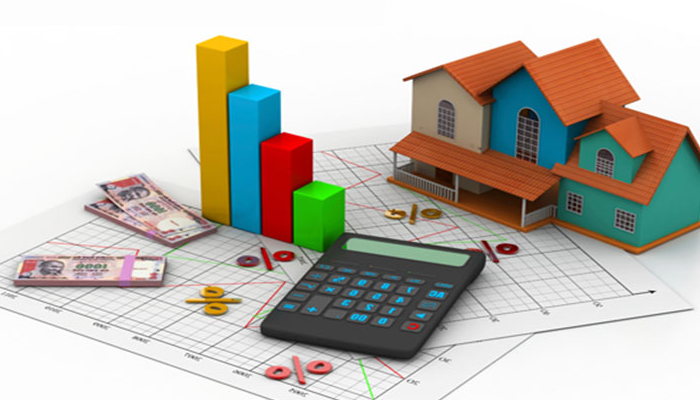

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [ ]:
# Extraction
def extract_data():
    data = pd.read_csv('kc_house_data.csv')
    return data

# Transformation
def transform_data(data):
    # Perform data cleansing
    data = data.dropna()  # Remove rows with missing values
    data['date'] = pd.to_datetime(data['date'])  # Convert date column to datetime format

    # Feature engineering
    data['age'] = 2023 - data['yr_built']  # Create a new 'age' feature based on the year built
    data['price_per_sqft'] = data['price'] / data['sqft_living']  # Calculate price per square foot

    # Data filtering and selection
    selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'age', 'price_per_sqft','price']
    filtered_data = data[selected_features]

    return filtered_data

def scatter_matrix(data):
    fig = px.scatter_matrix(data)
    fig.update_layout(title={'text': "Pair Plot",
                             'x': 0.49,
                             'xanchor': 'center',
                             'yanchor': 'top',
                             'font': {'size': 20}},
                      margin={'t': 100},
                      height=1000, width=1100)
    return fig

def imshow(data):
    fig = px.imshow(data.select_dtypes(exclude="object").corr(), text_auto=True)
    fig.update_xaxes(showline=False)
    fig.update_yaxes(showline=False)
    fig.update_layout(title={'text': "Pairwise Correlation of Columns",
                         'x': 0.49,
                         'xanchor': 'center',
                         'yanchor': 'top',
                         'font': {'size': 20}},
                      margin={'t': 100},
                      height=700,
                      width=700)
    return fig

def lr_model(data):
    X = data.drop("price", axis=1)
    y = data.price

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    lr = LinearRegression()
    lr.fit(x_train, y_train)
    preds = lr.predict(x_test)
    print(f"Model Coefficient is : {lr.coef_}\n")
    print(f"Model Intercept is : {lr.intercept_}\n")
    scores = cross_val_score(lr, X, y, cv=5, scoring="r2")
    print(f"Cross Validation Scores : {scores}")

def rf_model(data):
    X = data.drop("price", axis=1)
    y = data.price

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(x_train, y_train)
    rf_pred = rf.predict(x_test)

    print("R2 Score: ", round(r2_score(y_test, rf_pred),3))

In [ ]:
extracted_data = extract_data()
df = transform_data(extracted_data)
df.head()

,bedrooms,bathrooms,sqft_living,age,price_per_sqft,price
0,3,1.00,1180,68,188.050847,221900.0
1,3,2.25,2570,72,209.338521,538000.0
2,2,1.00,770,90,233.766234,180000.0
3,4,3.00,1960,58,308.163265,604000.0
4,3,2.00,1680,36,303.571429,510000.0


In [ ]:
scatter_matrix(df)

In [ ]:
imshow(df)

In [ ]:
lr_model(df)

Model Coefficient is : [-1895.95089119 14951.69471635   294.70152819   119.67006579
  2069.43308492]

Model Intercept is : -651619.2812873069

Cross Validation Scores : [0.86294218 0.8731915  0.87625182 0.89774925 0.89020624]


In [ ]:
rf_model(df)

R2 Score:  0.993


**Conclusion**

The art of house price prediction weaves a tapestry of sophisticated methodologies and data-driven insights, offering a panoramic view of the ever-evolving real estate landscape. By harnessing the power of regression analysis, machine learning algorithms, neural networks, and time series modeling, stakeholders gain a multidimensional understanding of property valuations. The fusion of these approaches, along with Comparative Market Analysis and geo-spatial considerations, crafts a comprehensive framework that encapsulates both the microcosmic details and macroeconomic influences that shape housing prices.

In essence, the realm of house price prediction is a dynamic blend of art and science, a symphony of algorithms and expertise, striving to unravel the intricate threads that determine property values. As the real estate market marches forward, armed with predictive prowess, stakeholders are better equipped to navigate its currents, contributing to a more informed, resilient, and efficient real estate ecosystem.